Performing EDA on Strokes Dataset

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Raw Data Analysis

In [104]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df_copy = df.copy()

In [105]:
df.shape

(5110, 12)

In [106]:
df.sample(8)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4691,25878,Male,55.0,0,0,Yes,Self-employed,Rural,97.68,47.1,formerly smoked,0
618,71533,Male,50.0,0,0,Yes,Private,Urban,158.31,32.8,formerly smoked,0
2715,60003,Male,81.0,0,0,Yes,Govt_job,Rural,89.02,26.9,never smoked,0
2915,34068,Female,23.0,0,0,Yes,Govt_job,Urban,77.53,33.9,formerly smoked,0
728,16575,Male,17.0,0,0,No,Private,Rural,94.92,23.5,never smoked,0
951,57372,Male,1.0,0,0,No,children,Rural,123.21,15.1,Unknown,0
4763,19191,Male,82.0,0,0,Yes,Private,Urban,217.57,33.5,formerly smoked,0
2939,52367,Male,46.0,0,0,Yes,Private,Urban,58.42,24.7,formerly smoked,0


In [107]:
df['smoking_status'].value_counts()
# df['work_type'].unique()  //only tells the name of unique values 

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

In [108]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [109]:
mis_val = df.isna().sum()
mis_val_per = 100*mis_val/len(df)
mis_val_table = pd.concat([mis_val,mis_val_per], axis=1)
mis_val_table_ren_columns = mis_val_table.rename(columns={0:'missing _values', 1:'% of total'})
mis_val_table_ren_columns

,missing _values,% of total
id,0,0.000000
gender,0,0.000000
age,0,0.000000
hypertension,0,0.000000
heart_disease,0,0.000000
ever_married,0,0.000000
work_type,0,0.000000
Residence_type,0,0.000000
avg_glucose_level,0,0.000000
bmi,201,3.933464


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [111]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [112]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes(object).columns.tolist()
numeric_cols,categorical_cols

(['id',
  'age',
  'hypertension',
  'heart_disease',
  'avg_glucose_level',
  'bmi',
  'stroke'],
 ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])

In [113]:
numeric_cols.remove('id')

In [114]:
numeric_cols_exclusion = [cols for cols in numeric_cols if cols not in ['hypertension', 'heart_disease']]

Text(0.5, 1.0, 'Heatmap with hypertension and heart_disease')

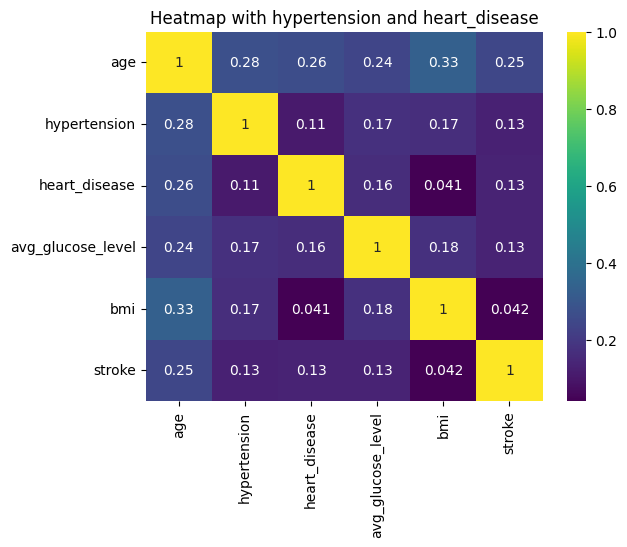

In [115]:
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='viridis')
plt.title('Heatmap with hypertension and heart_disease')

Text(0.5, 1.0, 'Heatmap without hypertension and heart_disease')

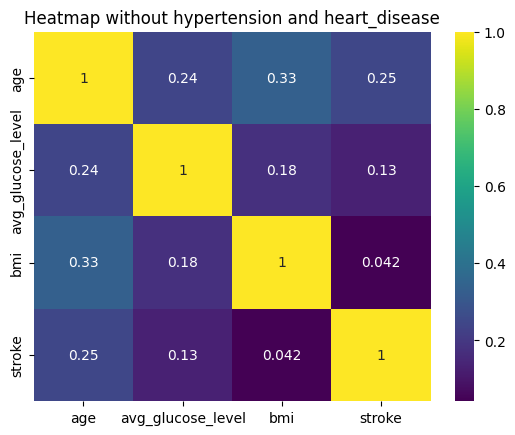

In [116]:
sns.heatmap(df[numeric_cols_exclusion].corr(), annot=True, cmap = 'viridis')
plt.title('Heatmap without hypertension and heart_disease')

In [118]:
df['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

<Axes: xlabel='gender', ylabel='stroke'>

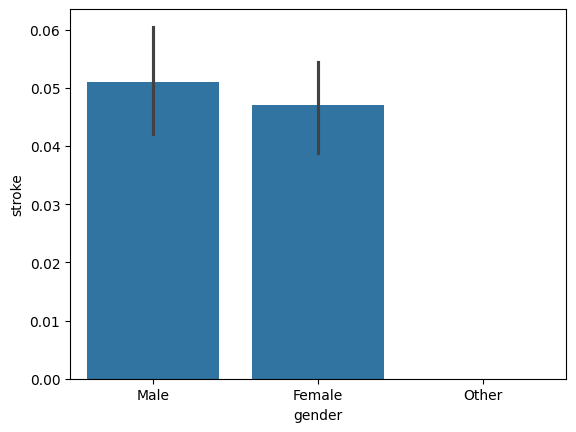

In [117]:
sns.barplot(df, x='gender', y='stroke')

<Axes: xlabel='avg_glucose_level', ylabel='bmi'>

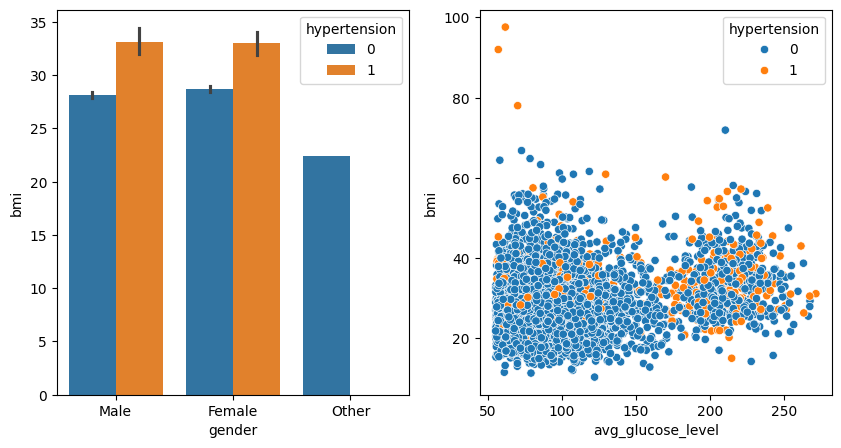

In [125]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.barplot(df, x='gender',y='bmi', hue='hypertension')

plt.subplot(1,2,2)
sns.scatterplot(df, x='avg_glucose_level',y='bmi', hue='hypertension')

<Axes: xlabel='gender', ylabel='hypertension'>

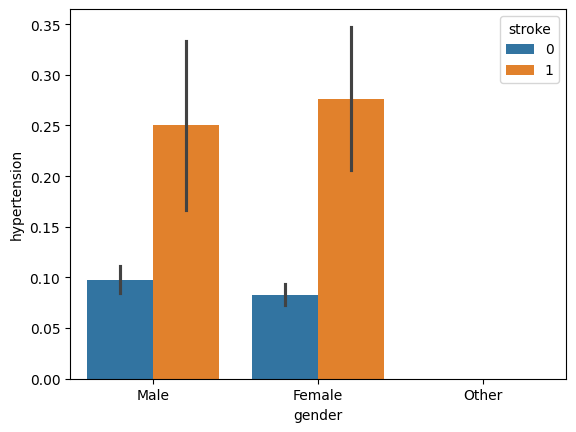

In [129]:
sns.barplot(df, x='gender',y='hypertension', hue='stroke')

<Axes: xlabel='stroke', ylabel='hypertension'>

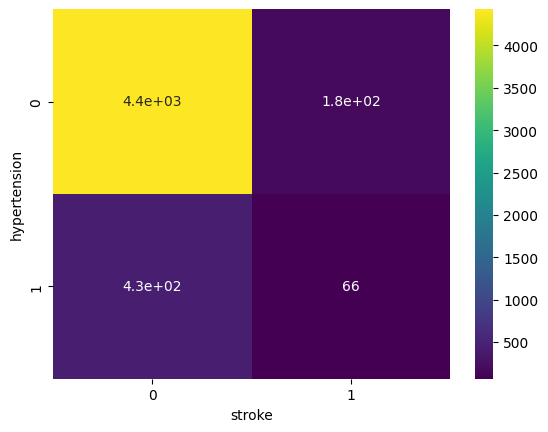

In [133]:
sns.heatmap(pd.crosstab(df['hypertension'],df['stroke']), annot=True, cmap='viridis')

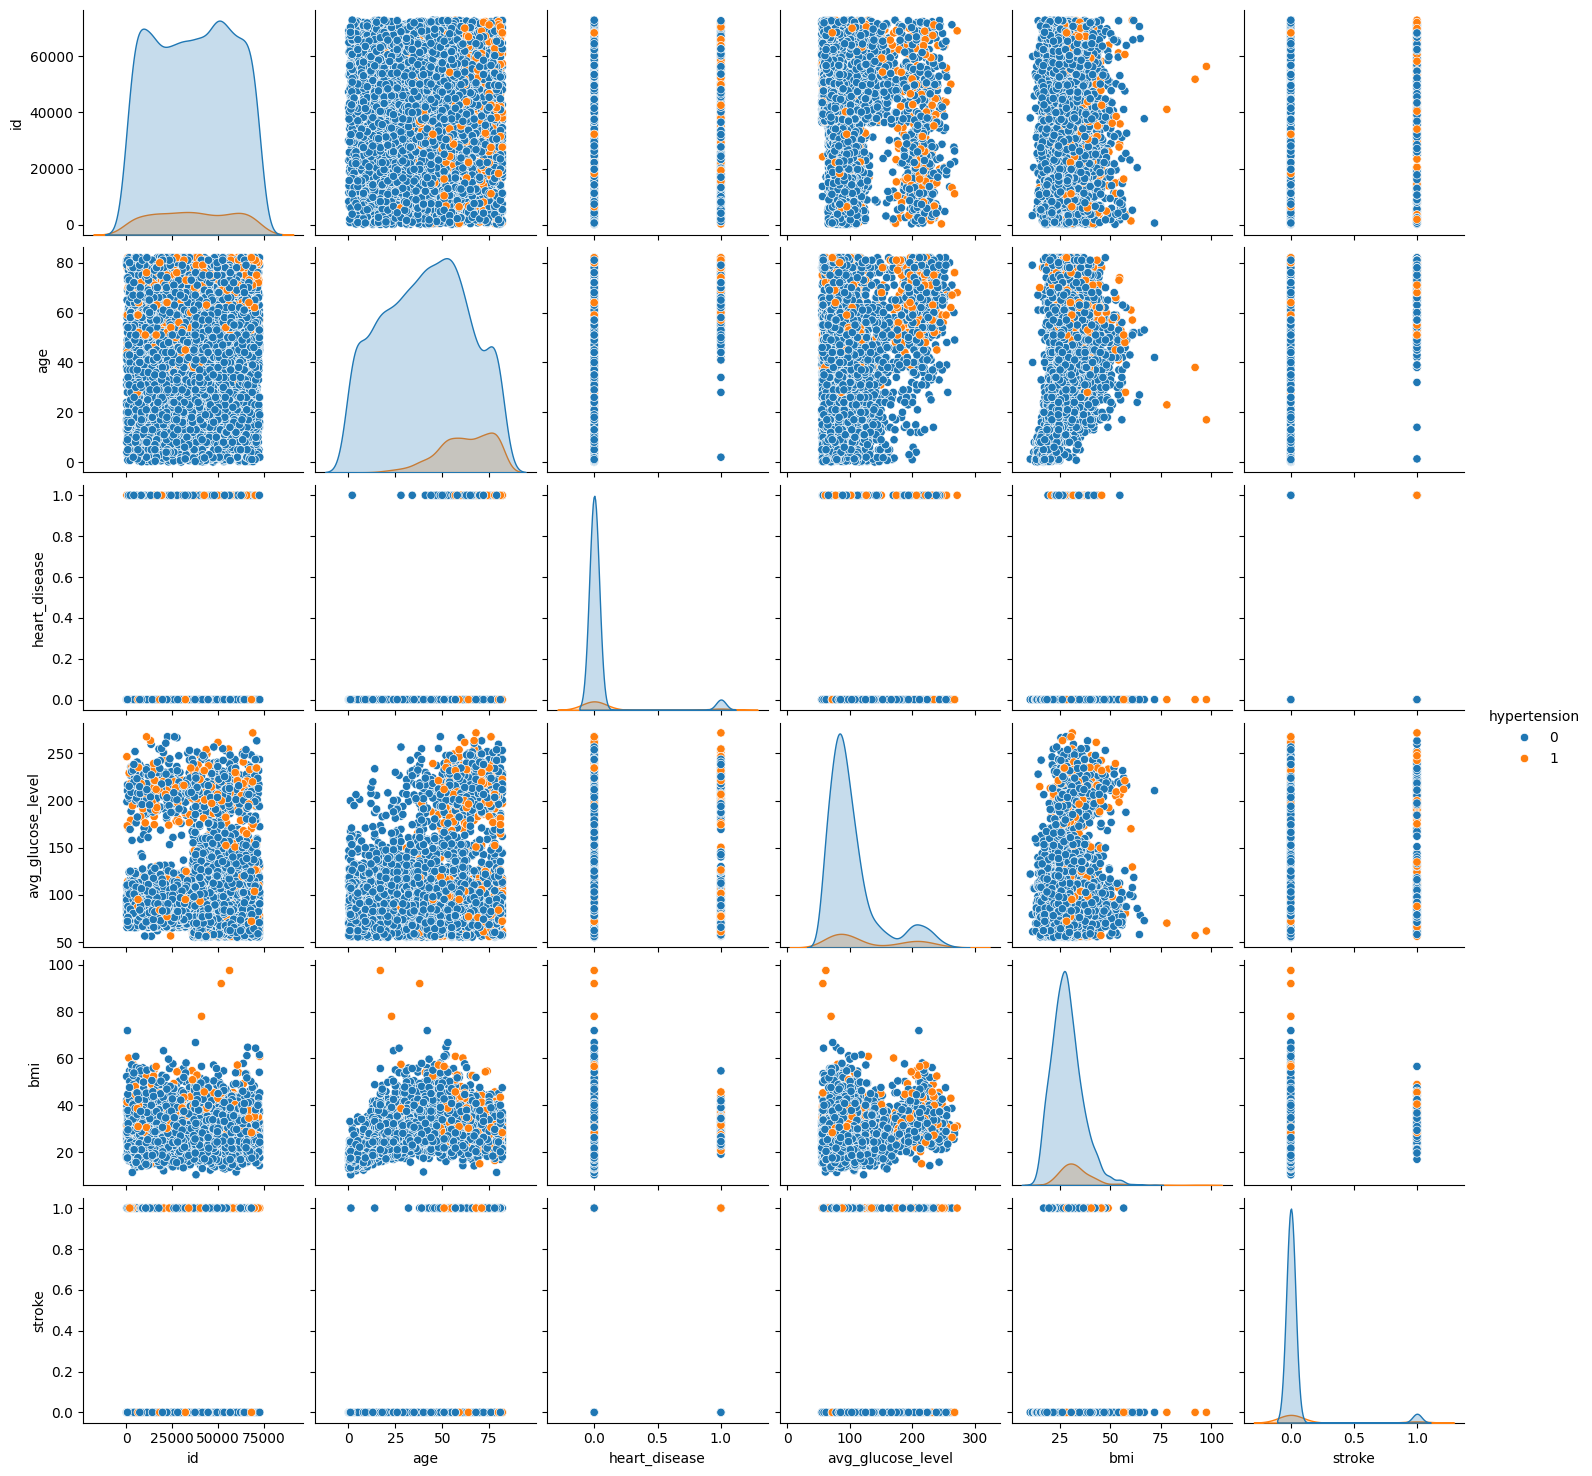

In [132]:
sns.pairplot(df, hue='hypertension')